In [1]:
import pickle
import numpy as np

In [2]:
X = pickle.load(open('X.pkl','rb'))
Y = pickle.load(open('Y.pkl','rb'))
X_test = pickle.load(open('X_test.pkl','rb'))
Y_test = pickle.load(open('Y_test.pkl','rb'))

In [3]:
X = X/255

In [4]:
X.shape

(150, 150, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import time 
import os
import tensorflow as tf

In [6]:
NAME = f'with-or-withoutmask-prediction-{int(time.time())}'
tensorboard = TensorBoard(log_dir= f'logs\\{NAME}\\')

# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# # model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), activation = 'relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# # model.add(Dropout(0.25))


# model.add(Conv2D(128, (3,3), activation = 'relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))
# # model.add(Dropout(0.25))


# model.add(Flatten()) 
# model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
# # model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(2, activation = 'softmax'))

model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=X.shape[1:]),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [10]:
model.fit(X, Y, epochs = 10, validation_split = 0.1, callbacks = [tensorboard, callbacks, checkpoint], batch_size = 8)

Epoch 1/10
  1/148 [..............................] - ETA: 0s - loss: 0.9685 - accuracy: 0.3750WARNING:tensorflow:From c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
148/148 [==============================] - ETA: 0s - loss: 0.8134 - accuracy: 0.8614WARNING:tensorflow:From c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensor

In [114]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 100)     2800      
_________________________________________________________________
batch_normalization_2 (Batch (None, 148, 148, 100)     400       
_________________________________________________________________
dropout_10 (Dropout)         (None, 148, 148, 100)     0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 129600)           

In [115]:
model.save("model1_with_vs_without_mask_10epoch.h5")

In [116]:
predict = model.predict(X_test,)

In [117]:
print(Y_test)

[1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 1 1 1]


In [118]:
prediction = []
for x in predict:
    if x[0]>=0.5:
        prediction.append(0)
    else:
        prediction.append(1)

In [119]:
prediction = np.array(prediction)

In [120]:
print(prediction)
len(prediction)

[1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 1]


194

In [121]:
count = 0;
for i in range(0, len(Y_test)):
    if Y_test[i]==prediction[i]:
        count = count + 1
print(count)

182


ValueError: num must be 1 <= num <= 24, not 25

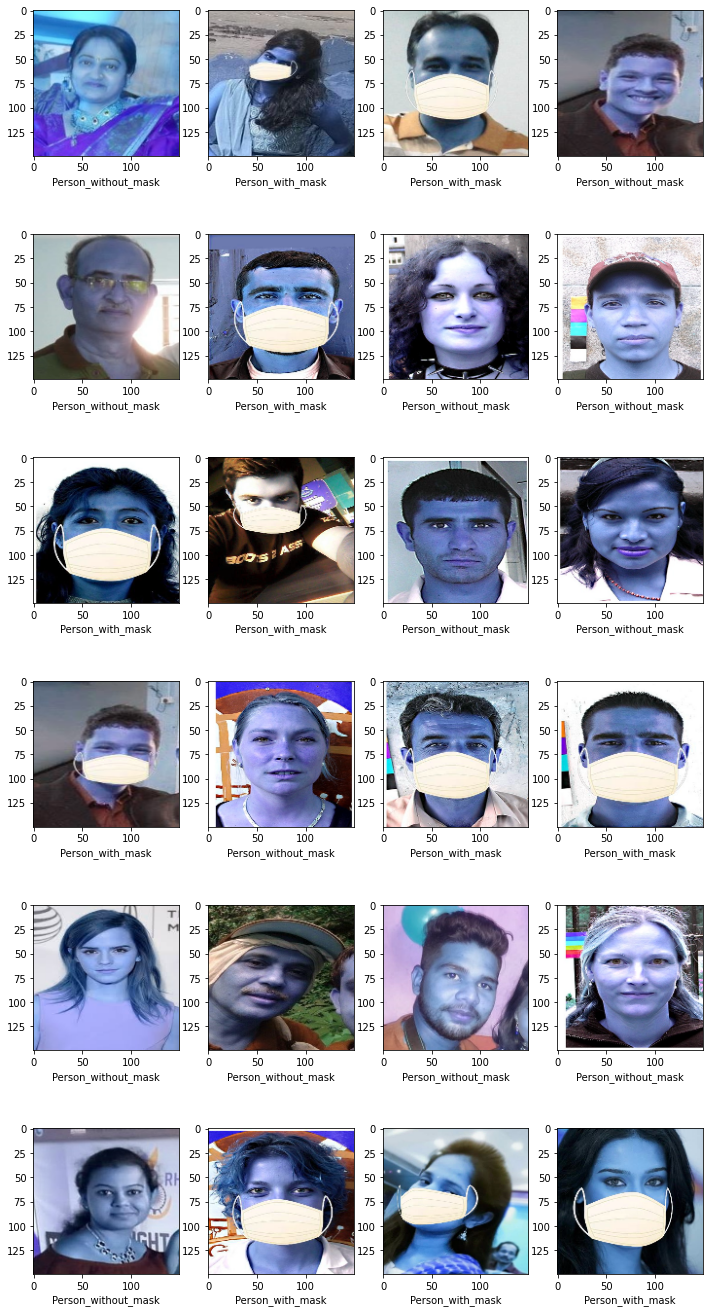

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 23))
index = 0
for img in X_test:
    plt.subplot(6, 4, index+1)
    plt.imshow(img)
    if prediction[index]==0:
        plt.xlabel('Person_with_mask')
    else:
        plt.xlabel('Person_without_mask')
    index = index + 1
        
plt.tight_layout()
plt.show()
